<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python/downloads/customer-segmentation-tutorial-in-python.zip/1

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from pandas import DataFrame
import pandas as pd
import io
RANDOM_SEED = 42

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
Mall_Customers = pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')), sep = ',')

In [5]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print('Shape of the Mall_Customers dataset: Rows, Columns')
Mall_Customers.shape

Shape of the Mall_Customers dataset: Rows, Columns


(200, 5)

In [9]:
print('Descriptive statistics of the Mall_Customers DataFrame:')
print(Mall_Customers.describe())

Descriptive statistics of the Mall_Customers DataFrame:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
Mall_Customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
Mall_Customers['Age_Range']='0 - Age - No Range'
Mall_Customers.loc[Mall_Customers['Age'].between(18, 24, inclusive = True), 'Age_Range'] = '1 - Age < 25'
Mall_Customers.loc[Mall_Customers['Age'].between(25, 30, inclusive = True), 'Age_Range'] = '2 - Age between 25 and 30'
Mall_Customers.loc[Mall_Customers['Age'].between(31, 40, inclusive = True), 'Age_Range'] = '3 - Age between 31 and 40'
Mall_Customers.loc[Mall_Customers['Age'].between(41, 50, inclusive = True), 'Age_Range'] = '4 - Age between 41 and 50'
Mall_Customers.loc[Mall_Customers['Age'].between(51, 60, inclusive = True), 'Age_Range'] = '5 - Age between 51 and 60'
Mall_Customers.loc[Mall_Customers['Age'] > 60, 'Age_Range'] = '6 - Age > 60'

In [0]:
Mall_Customers['Income_Range']='0 - Income - No Range'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'].between(15, 30, inclusive = True), 'Income_Range'] = '1 - Income under 30'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'].between(31, 50, inclusive = True), 'Income_Range'] = '2 - Income between 31 and 50'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'].between(51, 70, inclusive = True), 'Income_Range'] = '3 - Income between 51 and 70'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'].between(71, 90, inclusive = True), 'Income_Range'] = '4 - Income between 71 and 90'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'].between(91, 120, inclusive = True), 'Income_Range'] = '5 - Income between 91 and 120'
Mall_Customers.loc[Mall_Customers['Annual Income (k$)'] > 120, 'Income_Range'] = '6 - Income over 120k'

In [44]:
Mall_Customers['Income_Range'].value_counts()

3 - Income between 51 and 70     52
4 - Income between 71 and 90     52
2 - Income between 31 and 50     42
1 - Income under 30              32
5 - Income between 91 and 120    18
6 - Income over 120k              4
Name: Income_Range, dtype: int64

In [0]:
Mall_Customers_Agg = Mall_Customers.groupby(['Age_Range', 'Income_Range'])['Spending Score (1-100)'].agg('sum').reset_index()
Mall_Customers_Agg_Sorted = Mall_Customers_Agg.sort_values(by=['Age_Range', 'Income_Range'])

In [0]:
Mall_Customers_Agg_Age = Mall_Customers.groupby(['Age_Range'])['Spending Score (1-100)'].agg('sum').reset_index()
Mall_Customers_Agg_Age_Sorted = Mall_Customers_Agg_Age.sort_values(by=['Age_Range'])

In [67]:
Mall_Customers_Agg

,Age_Range,Income_Range,Spending Score (1-100)
0,1 - Age < 25,1 - Income under 30,755
1,1 - Age < 25,2 - Income between 31 and 50,578
2,1 - Age < 25,3 - Income between 51 and 70,616
3,1 - Age < 25,4 - Income between 71 and 90,20
4,2 - Age between 25 and 30,1 - Income under 30,227
5,2 - Age between 25 and 30,2 - Income between 31 and 50,213
6,2 - Age between 25 and 30,3 - Income between 51 and 70,215
7,2 - Age between 25 and 30,4 - Income between 71 and 90,824
8,2 - Age between 25 and 30,5 - Income between 91 and 120,253
9,2 - Age between 25 and 30,6 - Income over 120k,83


In [0]:
group_names=['<25 Yrs \n (19.6%)', '25-30 Yrs \n (18.1%)', '31-40 Yrs \n (34.4%)', '41-50 Yrs \n (13%)', '51-60 Yrs \n (7.5%)', '>60 Yrs \n (7.5%)']
group_size=list(Mall_Customers_Agg_Age_Sorted['Spending Score (1-100)'])

subgroup_names=['Income under 30', 'Income between 31 and 50', 'Income between 51 and 70', 'Income between 71 and 90'
                ,'Income under 30', 'Income between 31 and 50', 'Income between 51 and 70', 'Income between 71 and 90'
                , 'Income between 91 and 120', 'Income over 120k',
               'Income under 30', 'Income between 31 and 50', 'Income between 51 and 70', 'Income between 71 and 90'
                , 'Income between 91 and 120', 'Income over 120k',
               'Income under 30', 'Income between 31 and 50', 'Income between 51 and 70', 'Income between 71 and 90'
                , 'Income between 91 and 120', 'Income over 120k',
               'Income under 30', 'Income between 31 and 50', 'Income between 51 and 70', 'Income between 71 and 90'
                , 'Income between 91 and 120',
               'Income under 30', 'Income between 31 and 50', 'Income between 51 and 70']
subgroup_size=list(Mall_Customers_Agg_Sorted['Spending Score (1-100)'])

In [0]:
subgroup_names=['<30k', '31k-50k', '51k-70k', '', 
                '', '', '', '71k-90k', '', '', 
                '', '', '', '71k-90k', '', '', 
                '', '', '51k-70k', '', '', '',
                '', '31k-50k', '', '', '', 
                '', '', '51k-70k']

In [0]:
import matplotlib.pyplot as plt
# Create colors
a, b, c, d, e, f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples, plt.cm.Greys]
#a, b, c, d, e, f = ['#ff9999','#66b3ff','#99ff99','#ffcc99', "#396ab1", "#990011"]

In [0]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [0]:
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.9, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)],startangle=90
                ,autopct=lambda pct: func(pct, group_size)) 
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.9-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.25), a(0.4), a(0.25), a(0.4),
                                                                                                    b(0.15), b(0.25), b(0.15), b(0.25), b(0.15), b(0.25),
                                                                                                    c(0.15), c(0.25), c(0.15), c(0.25), c(0.15), c(0.25),
                                                                                                    d(0.15), d(0.25), d(0.15), d(0.25), d(0.15), d(0.25),
                                                                                                    e(0.15), e(0.3), e(0.15), e(0.3), e(0.15),
                                                                                                    f(0.25), f(0.5), f(0.25)]
                  ,startangle=90)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

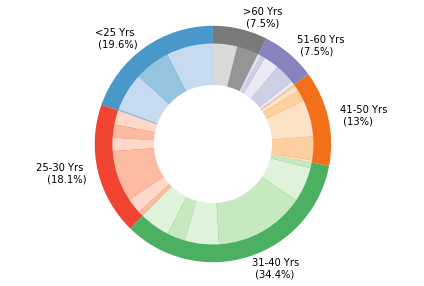

In [154]:
plt.pie(group_size, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)], startangle=90,frame=True)
       #,autopct='%1.1f%%')
       
plt.pie(subgroup_size,colors=[a(0.25), a(0.4), a(0.25), a(0.4),
                              b(0.15), b(0.25), b(0.15), b(0.25), b(0.15), b(0.25),
                              c(0.15), c(0.25), c(0.15), c(0.25), c(0.15), c(0.25),
                              d(0.15), d(0.25), d(0.15), d(0.25), d(0.15), d(0.25),
                              e(0.15), e(0.3), e(0.15), e(0.3), e(0.15),
                              f(0.25), f(0.5), f(0.25)],radius=0.85,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [25]:
list(Mall_Customers_Agg.columns)

['Age_Range', 'Income_Range', 'Spending Score (1-100)']

In [0]:
Mall_Customers_big4_agg=DataFrame({'Air Quality Measure' : Mall_Customers_big4.groupby(['CountyName', 'ReportYear'])['Value'].sum()}).reset_index()

In [0]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

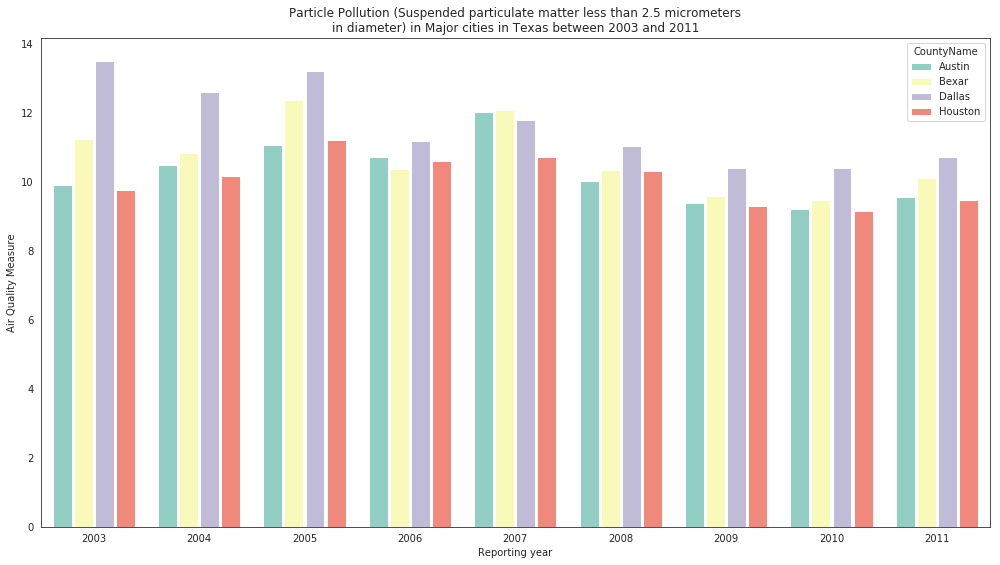

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
sns.set_style("white")

fig, ax = plt.subplots(figsize=(17,9))

g = sns.catplot(x="ReportYear", y="Air Quality Measure", hue="CountyName", data=Mall_Customers_big4_agg,
                kind="bar"#, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3"
                , ax=ax
                , legend=True
                , aspect=1.5
                , saturation=.85
                )

handles, labels = ax.get_legend_handles_labels()

ax.set_title("\n".join(wrap("Particle Pollution (Suspended particulate matter less than 2.5 micrometers in diameter) in Major cities in Texas between 2003 and 2011", 75)))

ax.set_xlabel('Reporting year')

#plt.legend(title='City', loc='upper right', labels=['Austin', 'San Antonio', 'Dallas', 'Houston'])
plt.close(g.fig)
change_width(ax, .18)
#plt.show(g)

Text(0.5, 0, 'City Name')

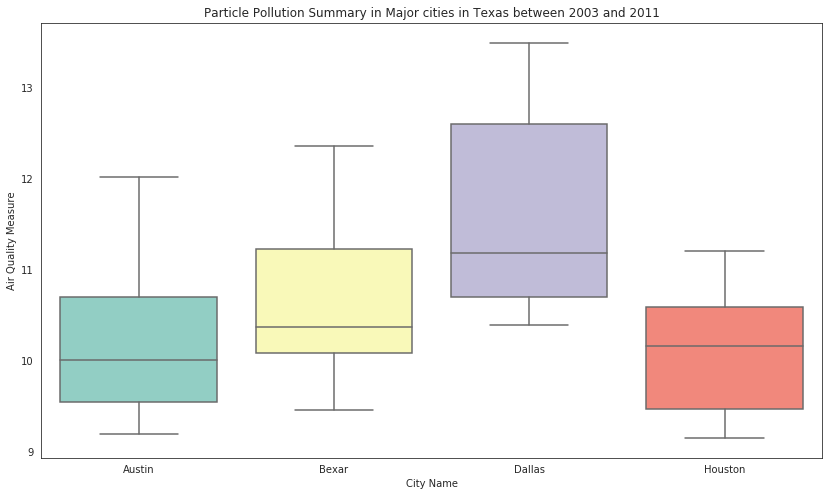

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(y="Air Quality Measure", x="CountyName", data=TX_Air_Quality_big4_agg
                #, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3", saturation=.85)
ax.set_title("\n".join(wrap("Particle Pollution Summary in Major cities in Texas between 2003 and 2011", 75)))
ax.set_xlabel('City Name')